In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# algoritma klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Algoritma regresi
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# dataset
from sklearn.datasets import load_iris, fetch_california_housing

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


Klasifikasi iris data set

In [9]:
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

print("📊 Dataset Iris:")
print(f"Jumlah sampel: {len(X_iris)}")
print(f"Jumlah fitur: {X_iris.shape[1]}")
print(f"Kelas target: {iris.target_names}")
print("\nContoh data:")
print(X_iris.head())

📊 Dataset Iris:
Jumlah sampel: 150
Jumlah fitur: 4
Kelas target: ['setosa' 'versicolor' 'virginica']

Contoh data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


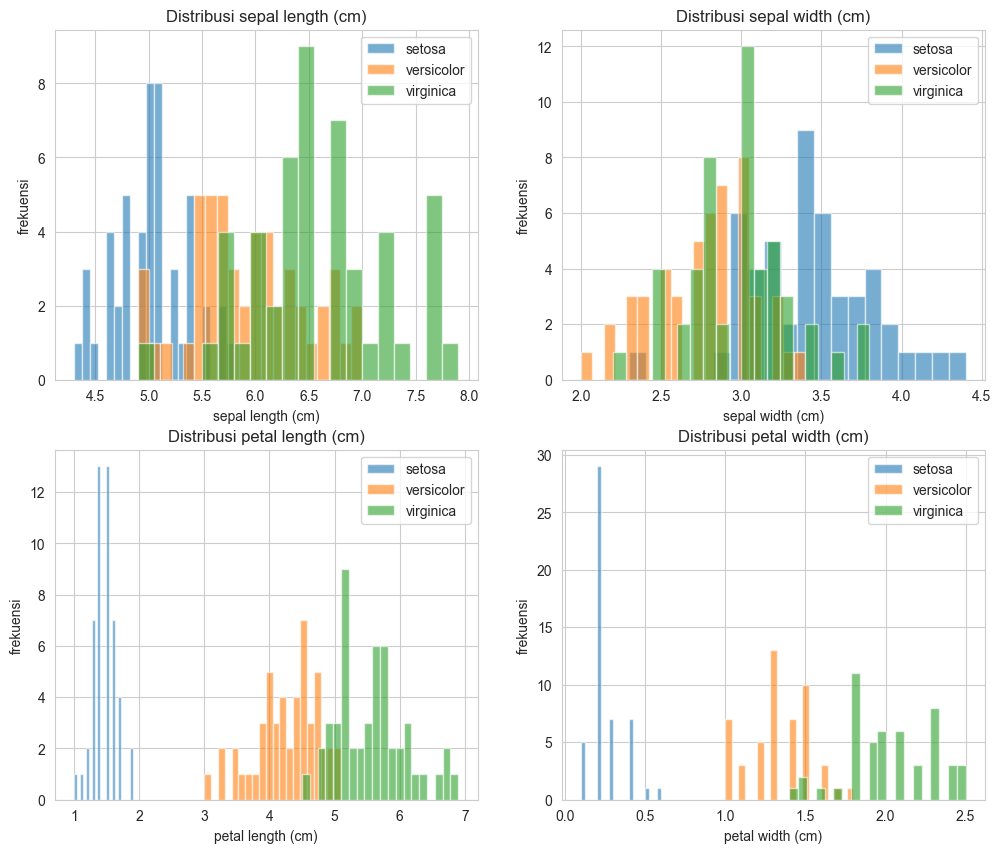

In [15]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
features = X_iris.columns

for idx, feature in enumerate(features):
    ax = axes[idx // 2 , idx % 2]
    for target, name in enumerate(iris.target_names):
        mask = y_iris == target
        ax.hist(X_iris[feature][mask], alpha=0.6, label=name, bins=20)
    ax.set_xlabel(feature)
    ax.set_ylabel('frekuensi')
    ax.set_title(f"Distribusi {feature}")
    ax.legend()

In [33]:
# split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_iris, y_iris, test_size= 0.2, random_state=42, stratify=y_iris
)

# standarisasi  fitur 
scalar_cls = StandardScaler()
X_train_cls_scaled = scalar_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scalar_cls.transform(X_test_cls)

# training berbagai model klasidikasi

models_cls = {
    'Logistic Regression' : LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators = 100, random_state=42),
    'SVM' : SVC(kernel='rbf', random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5)
}

results_cls = {}


In [34]:
print("training model klasifikasi")
for name, model in models_cls.items():
    #training
    model.fit(X_train_cls_scaled, y_train_cls)

    # prediksi
    y_pred = model.predict(X_test_cls_scaled)

    # ecalusasi
    acc = accuracy_score(y_test_cls, y_pred)
    results_cls[name] = acc

    print(f"{name}:")
    print(f"akurasi : {acc:.4f}")
    print()

training model klasifikasi
Logistic Regression:
akurasi : 0.9333

Decision Tree:
akurasi : 0.9333

Random Forest:
akurasi : 0.9000

SVM:
akurasi : 0.9667

KNN:
akurasi : 0.9333



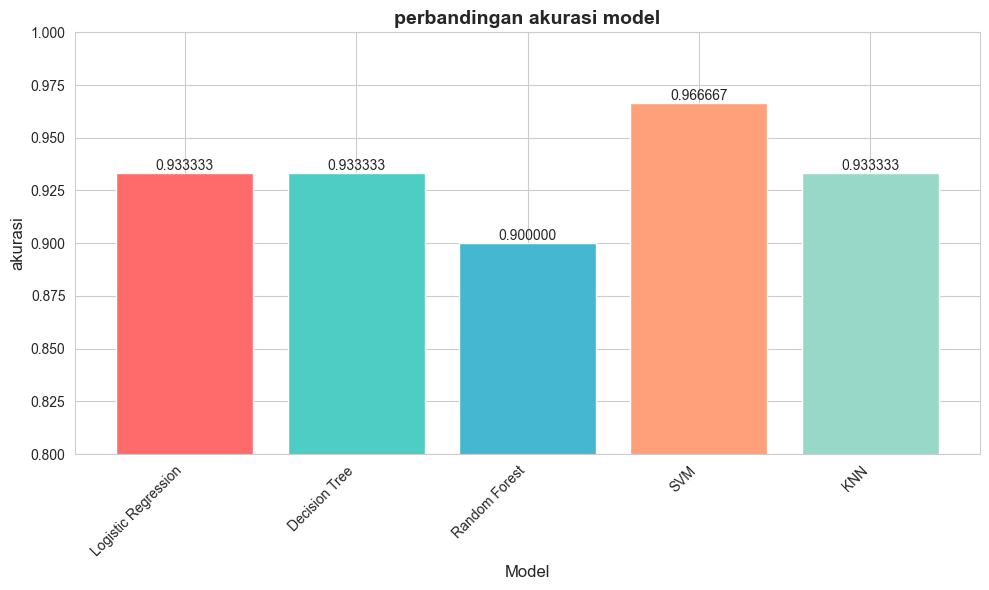

In [45]:
# visualisasi perbandingan akurasi

plt.figure(figsize=(10,6))
models_name = list(results_cls.keys())
accuracies = list(result_cls.values())

bars = plt.bar(models_name, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('akurasi', fontsize=12)
plt.title('perbandingan akurasi model', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.8, 1.0])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:4f}', ha= 'center', va = 'bottom', fontsize=10)

plt.tight_layout()
plt.show()

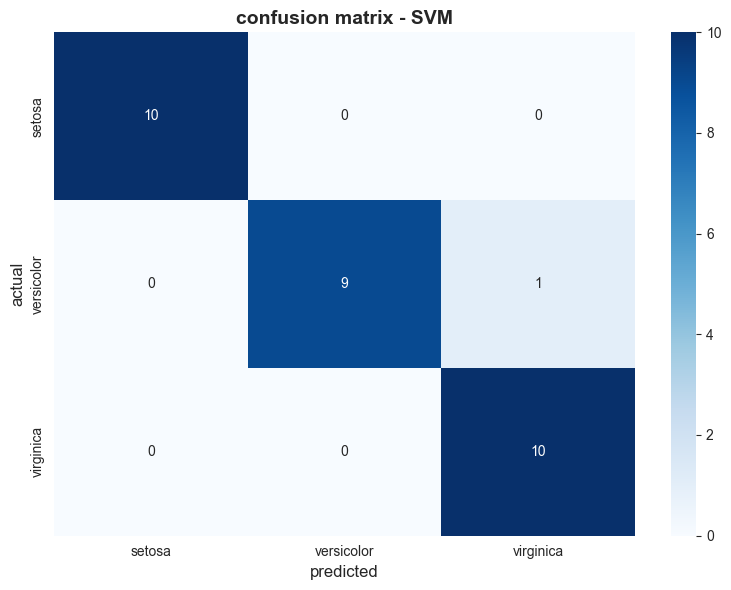


📈 Classification Report - SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [49]:
# confusiion matrix model terbaik
best_model_name = max(results_cls, key=results_cls.get)
best_model = models_cls[best_model_name]
y_pred_best = best_model.predict(X_test_cls_scaled)

cm = confusion_matrix(y_test_cls, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names)
plt.title(f'confusion matrix - {best_model_name}', fontsize = 14,  fontweight='bold')
plt.ylabel('actual', fontsize=12)
plt.xlabel('predicted', fontsize=12)
plt.tight_layout()
plt.show()
print(f"\n📈 Classification Report - {best_model_name}:")
print(classification_report(y_test_cls, y_pred_best, target_names=iris.target_names))

In [51]:
# regresi 
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns= housing.feature_names)
y_housing = housing.target

print('dataset california housing :')
print(f'jumlah sample : {len(X_housing)}')
print(f'jumlah fitur : {X_housing.shape[1]}')
print('deskripsi fitur')
for col in X_housing.columns:
    print(f'-{col}')
print(X_housing.head())
print(f"\nTarget (harga rumah dalam $100k):")
print(f"  Min: ${y_housing.min():.2f}00k")
print(f"  Max: ${y_housing.max():.2f}00k")
print(f"  Mean: ${y_housing.mean():.2f}00k")


dataset california housing :
jumlah sample : 20640
jumlah fitur : 8
deskripsi fitur
-MedInc
-HouseAge
-AveRooms
-AveBedrms
-Population
-AveOccup
-Latitude
-Longitude
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (harga rumah dalam $100k):
  Min: $0.1500k
  Max: $5.0000k
  Mean: $2.0700k


In [61]:
sample_size = 5000
indices = np.random.choice(len(X_housing), sample_size, replace=False)
X_housing_sample = X_housing.iloc[indices]
y_housing_sample = y_housing[indices]

# split data untuk regresi
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_housing_sample, y_housing_sample, test_size=0.2, random_state=42
)

# standarisisasi fitur
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.fit_transform(X_test_reg)

print(f'data training : {X_train_reg.shape}')
print(f'data testing : {X_test_reg.shape}')

data training : (4000, 8)
data testing : (1000, 8)


In [66]:
# training berbagai model regresi 
models_reg = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest' : RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

results_regs = []

print('training model regresi')
for name, model in models_reg.items():
    #training
    model.fit(X_train_reg_scaled, y_train_reg)

    # prediksi
    y_pred = model.predict(X_test_reg_scaled)

    # evaluasi
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absplute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)

    results_reg[name] = {
    'RMSE' : rmse,
    'MAE' : mae,
    'R²': r2,
        'predictions': y_pred
    }
    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print()

training model regresi


NameError: name 'mean_absplute_error' is not defined